# **SIM and Census Correlation Analysis**

In [0]:
#Importing all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [87]:
#Import SIM data and filter out only 2016 data
fire_df = pd.read_csv('donneesouvertes-interventions-sim (2).csv')
fire_df['creation_datetime'] = pd.to_datetime(fire_df['creation_date_time'])
fire_df = fire_df.set_index('creation_datetime')
fire_df = fire_df['2016-01-01' :'2016-12-31']
fire_df.head()

,incident_nbr,creation_date_time,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites
creation_datetime,,,,,,,,,,,
2016-01-01 00:00:50,1,2016-01-01 00:00:50,Premier répondant,Premier répondant,77,Montréal-Ouest,Indéterminé,4,45.452849,-73.645278,1.0
2016-01-01 00:02:42,2,2016-01-01 00:02:42,Premier répondant,Premier répondant,25,Montréal,Ville-Marie,6,45.498051,-73.577476,1.0
2016-01-01 00:05:48,3,2016-01-01 00:05:48,Premier répondant,Premier répondant,17,Montréal,Montréal-Nord,8,45.584992,-73.629010,1.0
2016-01-01 00:08:24,4,2016-01-01 00:08:24,Premier répondant,Premier répondant,25,Montréal,Ville-Marie,6,45.497394,-73.578090,1.0
2016-01-01 00:09:11,5,2016-01-01 00:09:11,Premier répondant,Premier répondant,20,Montréal,Ville-Marie,6,45.517014,-73.557496,1.0


In [88]:
# Creating a dataframe that consists of the frequency of each kind of incident grouped by the neighborhood (arrondiement)
fire_df = fire_df.reset_index()
fire_type_arron = pd.DataFrame([fire_df.nom_arrond,fire_df.description_groupe]).transpose()
fire_type_arron['freq'] = 0
fire_type_arron_freq = fire_type_arron.groupby([fire_type_arron.nom_arrond,fire_type_arron.description_groupe]).freq.count()
fire_type_arron_freq = pd.DataFrame(fire_type_arron_freq)

fire_type_arron.head()
fire_type_arron_freq = fire_type_arron_freq.reset_index()
fire_type_arron_freq.head()

,nom_arrond,description_groupe,freq
0,Ahuntsic / Cartierville,Alarmes-incendies,767
1,Ahuntsic / Cartierville,Autres incendies,209
2,Ahuntsic / Cartierville,Fausses alertes/annulations,8
3,Ahuntsic / Cartierville,Incendies de bâtiments,76
4,Ahuntsic / Cartierville,Premier répondant,5117


In [97]:
#Import Census Data for 2016
census = pd.read_csv('census2016.csv')
census.head()

,Unnamed: 0,AGGLOMÉRATION DE MONTRÉAL,Ville de Montréal,Ahuntsic-Cartierville,Anjou,Côte-des-Neiges–Notre-Dame-de-Grâce,Lachine,LaSalle,Le Plateau-Mont-Royal,Le Sud-Ouest,...,Dorval,Hampstead,Kirkland,Montréal-Est,Montréal-Ouest,Mont-Royal,Pointe-Claire,Sainte-Anne-de-Bellevue,Senneville,Westmount
0,population2016,"1,942,044","1,704,694","134,245","42,796","166,520","44,489","76,853","104,000","78,151",...,"18,980","6,973","20,151","3,850","5,050","20,276","31,380","4,958",921,"20,312"
1,population2011,"1,886,481","1,649,519","126,891","41,928","165,031","41,616","74,276","100,390","71,546",...,"18,208","7,153","21,253","3,728","5,085","19,503","30,790","5,073",920,"19,931"
2,percVariation2011_2016,2.9,3.3,5.8,2.1,0.9,6.9,3.5,3.6,9.2,...,4.2,-2.5,-5.2,3.3,-0.7,4.0,1.9,-2.3,0.1,1.9
3,area_km2,499.1,365.2,24.2,13.7,21.4,17.7,16.3,8.1,15.7,...,20.9,1.8,9.6,12.5,1.4,7.6,18.8,10.6,7.5,4.0
4,density,"3,891","4,668","5,556","3,128","7,767","2,511","4,724","12,792","4,984",...,910,"3,904","2,094",309,"3,597","2,652","1,666",470,123,"5,055"


In [0]:
# Correcting the names of the neighbourhood so it matches with the neighborhoods in fire data.
census.columns = ['Unnamed: 0', 'AGGLOMÉRATION DE MONTRÉAL', 'Ville de Montréal','Ahuntsic / Cartierville','Anjou','Côte-des-Neiges / Notre-Dame-de-Grâce','Lachine', 'Lasalle','Plateau Mont-Royal','Sud-Ouest',"L'Ile-Bizard / Ste-Geneviève",'Mercier / Hochelaga-Maisonneuve','Montréal-Nord','Outremont','Pierrefonds / Roxboro','Rivière-des-Prairies / Pointe-aux-Trembles','Rosemont / Petite-Patrie','Saint-Laurent','Saint-Léonard','Verdun','Ville-Marie','Villeray / St-Michel / Parc Extension',"Baie-D'Urfé",'Beaconsfield',
       'Côte-Saint-Luc', 'Dollard-Des Ormeaux', 'Dorval', 'Hampstead',
       'Kirkland', 'Montréal-Est', 'Montréal-Ouest', 'Mont-Royal',
       'Pointe-Claire', 'Sainte-Anne-de-Bellevue', 'Senneville', 'Westmount']

In [99]:
census = census.transpose()
columList = census.iloc[0,:].tolist()
census.columns = columList
census = census.iloc[2:,:]
census.head()
census = census.iloc[1:,:]
census.head()

,population2016,population2011,percVariation2011_2016,area_km2,density,population_total,population_0_4yrs,population_5_9yrs,population_10_14yrs,population_15_19yrs,...,houseHoldIncome_2015_45K_50K,houseHoldIncome_2015_50K_60K,houseHoldIncome_2015_60K_70K,houseHoldIncome_2015_70K_80K,houseHoldIncome_2015_80K_90K,houseHoldIncome_2015_90K_100K,houseHoldIncome_2015_100K_125K,houseHoldIncome_2015_125K_150K,houseHoldIncome_2015_150K_200K,houseHoldIncome_2015_200KPlus
Ahuntsic / Cartierville,"134,245","126,891",5.8,24.2,"5,556","134,245","8,610","7,855","6,280","6,435",...,"2,990","5,485","4,540","3,500","2,880","2,460","3,895","2,295","2,610","2,465"
Anjou,"42,796","41,928",2.1,13.7,"3,128","42,800","2,440","2,605","2,210","2,095",...,"1,105","1,955","1,575","1,335","1,070",745,"1,415",815,720,565
Côte-des-Neiges / Notre-Dame-de-Grâce,"166,520","165,031",0.9,21.4,"7,767","166,515","9,495","9,285","8,060","9,250",...,"3,605","6,290","5,210","4,030","3,305","2,460","4,085","2,705","2,775","3,410"
Lachine,"44,489","41,616",6.9,17.7,"2,511","44,485","2,535","2,470","2,190","2,245",...,"1,020","1,850","1,410","1,175","1,065",870,"1,525",930,905,745
Lasalle,"76,853","74,276",3.5,16.3,"4,724","76,860","4,455","4,290","3,735","3,950",...,"2,075","3,450","2,790","2,125","1,775","1,465","2,540","1,400","1,160",635


In [100]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Ahuntsic / Cartierville to Westmount
Columns: 171 entries, population2016 to houseHoldIncome_2015_200KPlus
dtypes: object(171)
memory usage: 44.3+ KB


In [104]:
# change the data type of the columns from Object to float
for i in range(census.columns.size) :
  census[census.columns[i]] = census[census.columns[i]].str.replace(",","").astype(float)
census.reset_index()
  
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Columns: 172 entries, index to houseHoldIncome_2015_200KPlus
dtypes: float64(171), object(1)
memory usage: 44.4+ KB


In [119]:
# Merging the fire incident frequency dataset with census dataset
fire_cen_type_aron_freq = pd.merge(left=fire_type_arron_freq, right=census, left_on=fire_type_arron_freq.nom_arrond, right_on=census['index'], how='left')
fire_cen_type_aron_freq.head()

,nom_arrond,description_groupe,freq,index,population2016,population2011,percVariation2011_2016,area_km2,density,population_total,...,houseHoldIncome_2015_45K_50K,houseHoldIncome_2015_50K_60K,houseHoldIncome_2015_60K_70K,houseHoldIncome_2015_70K_80K,houseHoldIncome_2015_80K_90K,houseHoldIncome_2015_90K_100K,houseHoldIncome_2015_100K_125K,houseHoldIncome_2015_125K_150K,houseHoldIncome_2015_150K_200K,houseHoldIncome_2015_200KPlus
0,Ahuntsic / Cartierville,Alarmes-incendies,767,Ahuntsic / Cartierville,134245.0,126891.0,5.8,24.2,5556.0,134245.0,...,2990.0,5485.0,4540.0,3500.0,2880.0,2460.0,3895.0,2295.0,2610.0,2465.0
1,Ahuntsic / Cartierville,Autres incendies,209,Ahuntsic / Cartierville,134245.0,126891.0,5.8,24.2,5556.0,134245.0,...,2990.0,5485.0,4540.0,3500.0,2880.0,2460.0,3895.0,2295.0,2610.0,2465.0
2,Ahuntsic / Cartierville,Fausses alertes/annulations,8,Ahuntsic / Cartierville,134245.0,126891.0,5.8,24.2,5556.0,134245.0,...,2990.0,5485.0,4540.0,3500.0,2880.0,2460.0,3895.0,2295.0,2610.0,2465.0
3,Ahuntsic / Cartierville,Incendies de bâtiments,76,Ahuntsic / Cartierville,134245.0,126891.0,5.8,24.2,5556.0,134245.0,...,2990.0,5485.0,4540.0,3500.0,2880.0,2460.0,3895.0,2295.0,2610.0,2465.0
4,Ahuntsic / Cartierville,Premier répondant,5117,Ahuntsic / Cartierville,134245.0,126891.0,5.8,24.2,5556.0,134245.0,...,2990.0,5485.0,4540.0,3500.0,2880.0,2460.0,3895.0,2295.0,2610.0,2465.0


In [121]:

fire_cen_type_aron_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Columns: 175 entries, nom_arrond to houseHoldIncome_2015_200KPlus
dtypes: float64(171), int64(1), object(3)
memory usage: 163.6+ KB


In [134]:
fire_cen_type_aron_freq.dropna(inplace=True)
fire_cen_type_aron_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 118
Columns: 175 entries, nom_arrond to houseHoldIncome_2015_200KPlus
dtypes: float64(171), int64(1), object(3)
memory usage: 155.4+ KB


In [138]:
# Calculating the pearson correlation matrix between all the census feature and the frequency of the diffrent types of incidents for the corresponding neighborhoods.

c_matrix = pd.DataFrame(index=fire_cen_type_aron_freq.columns[4:175],columns=fire_cen_type_aron_freq.description_groupe.unique().tolist())
types = fire_cen_type_aron_freq.description_groupe.unique().tolist()

for type in range(len(types)) :
  relevant_rows = fire_cen_type_aron_freq[fire_cen_type_aron_freq.description_groupe == types[type]]
  for j in range(4,175) :
    c_matrix.iloc[j-4, type] = np.corrcoef(relevant_rows.freq,relevant_rows.iloc[:,j])[0][1] 

for i in range(0,6) :
  if c_matrix[c_matrix.columns[i]].dtype == object :
    c_matrix[c_matrix.columns[i]] = c_matrix[c_matrix.columns[i]].astype('float')    
c_matrix

,Alarmes-incendies,Autres incendies,Fausses alertes/annulations,Incendies de bâtiments,Premier répondant,Sans incendie
population2016,0.594237,0.730211,0.698660,0.881374,0.733402,0.760297
population2011,0.579671,0.714180,0.687729,0.875690,0.722340,0.748479
percVariation2011_2016,0.261614,0.266747,0.207886,0.098599,0.158194,0.204106
area_km2,0.056356,0.308269,0.003670,0.029435,0.139941,0.019796
density,0.385716,0.309591,0.524093,0.625357,0.382995,0.558991
population_total,0.594246,0.730215,0.698650,0.881384,0.733417,0.760305
population_0_4yrs,0.401271,0.544584,0.502154,0.749297,0.569464,0.572064
population_5_9yrs,0.294770,0.424263,0.361132,0.643252,0.445244,0.451541
population_10_14yrs,0.254808,0.379404,0.301254,0.590875,0.385804,0.399481
population_15_19yrs,0.411506,0.498722,0.424741,0.695722,0.510917,0.548609


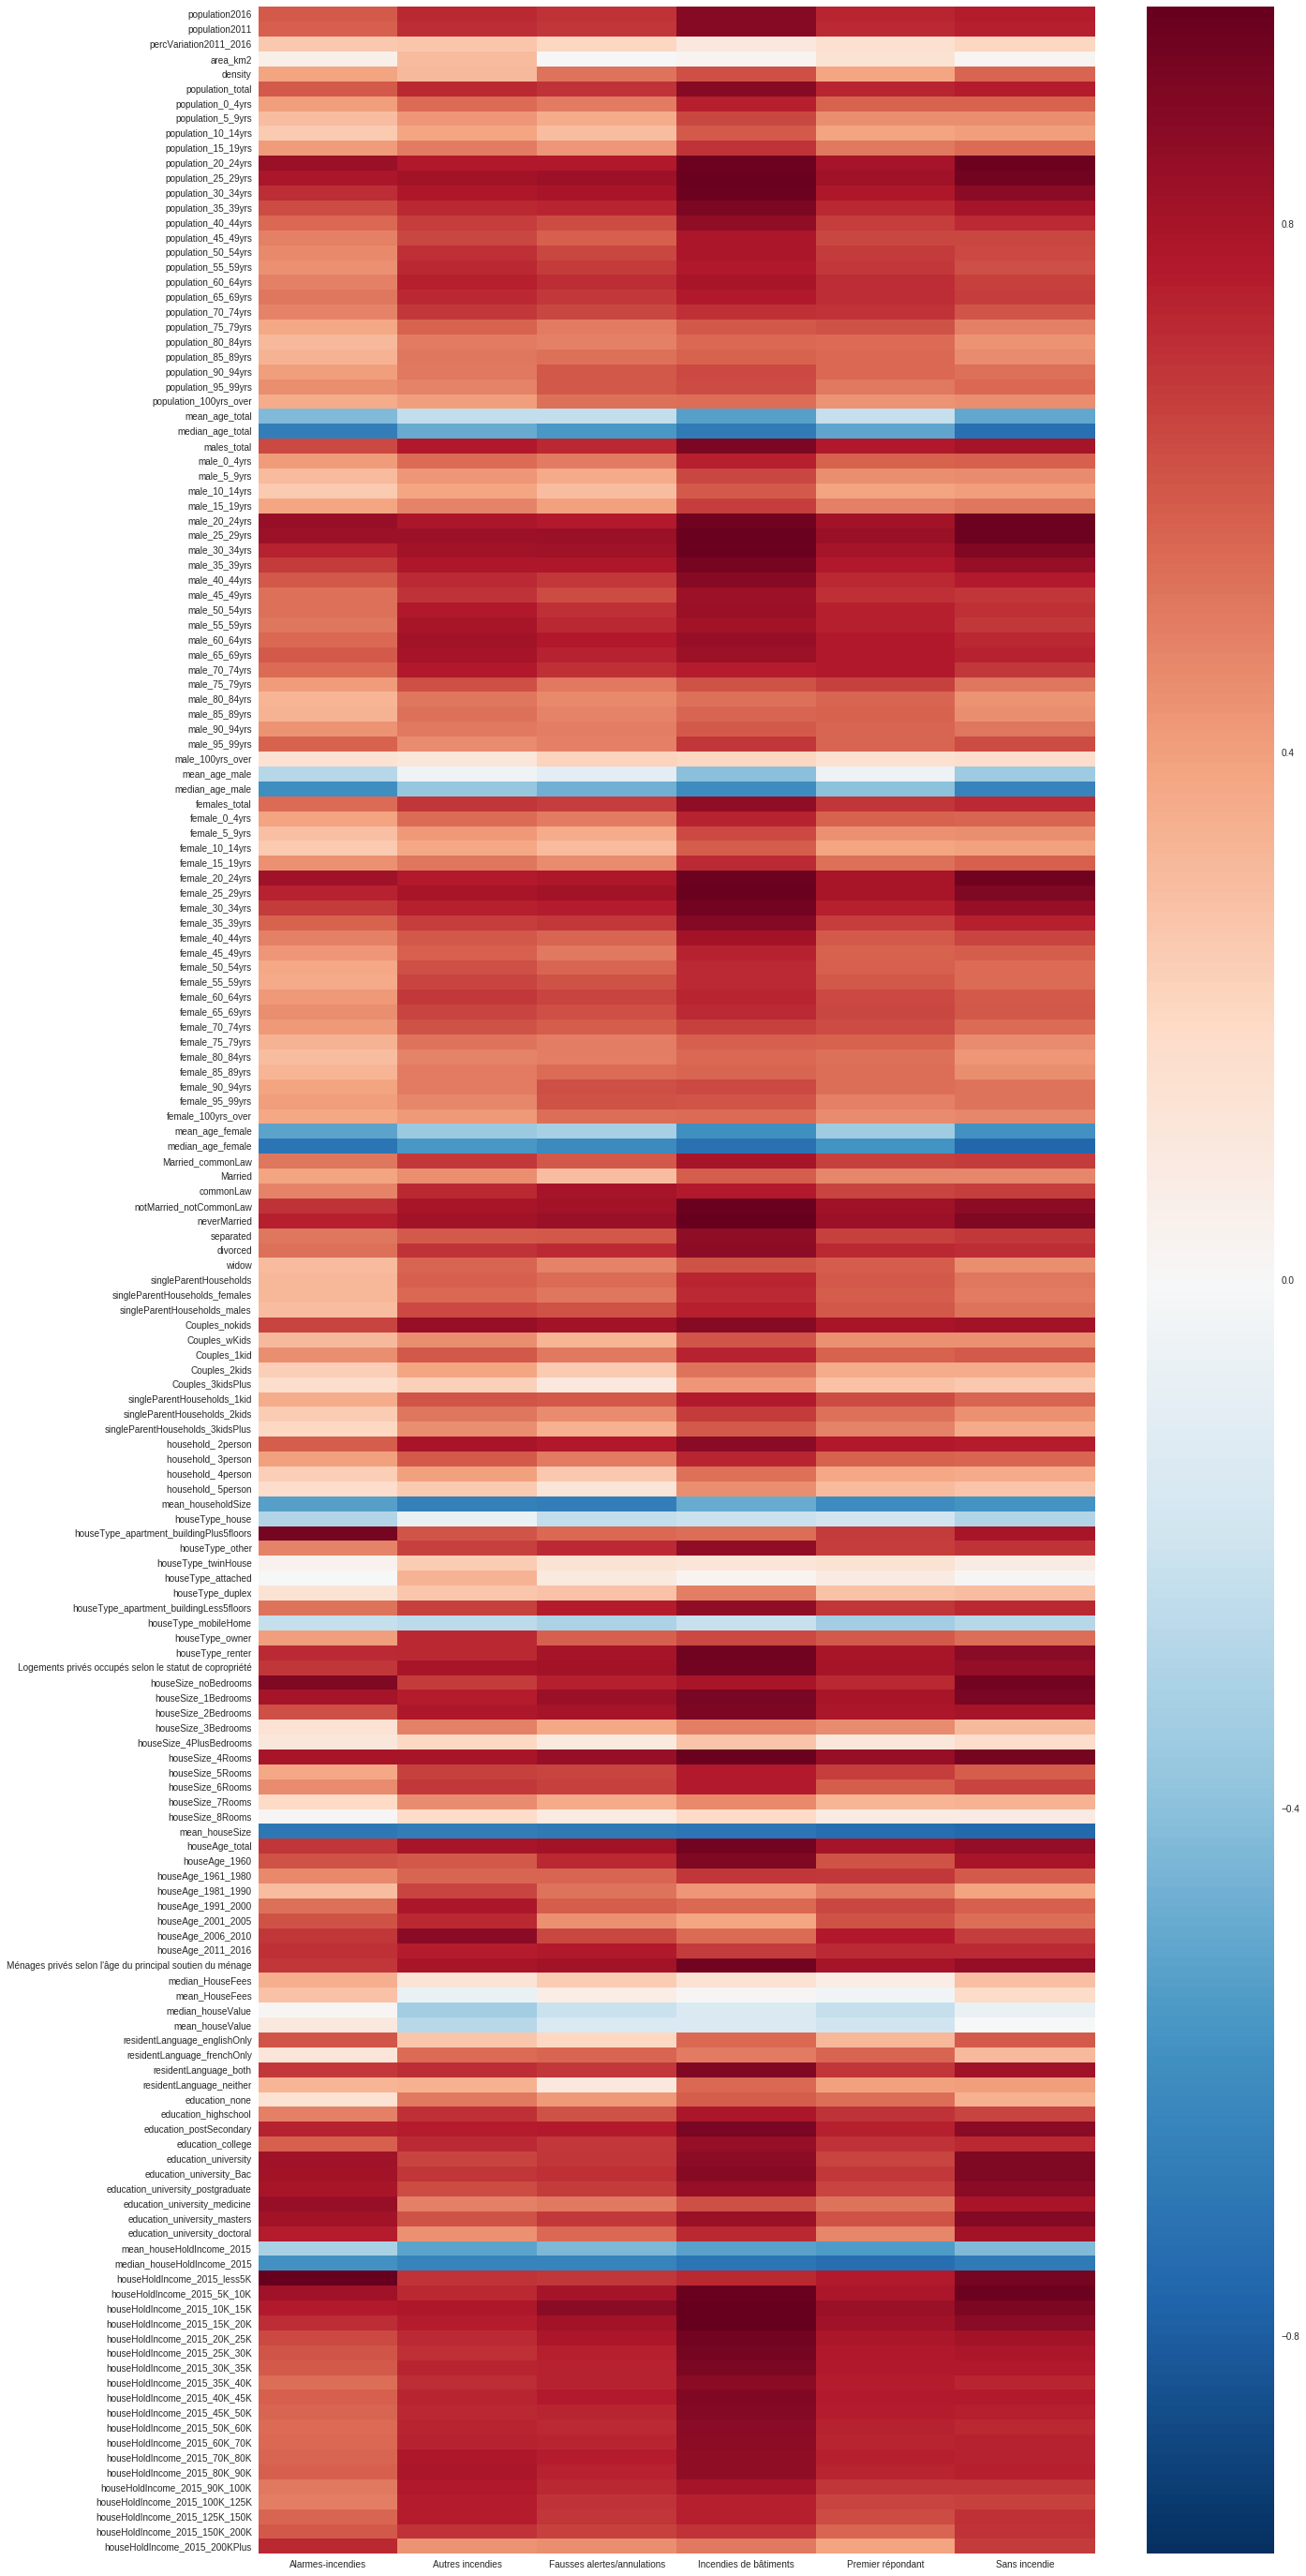

In [139]:
import seaborn as sns
plt.figure(figsize=(20,50))
sns.heatmap(c_matrix, 
            xticklabels=c_matrix.columns.values,
            yticklabels=c_matrix.index.values)

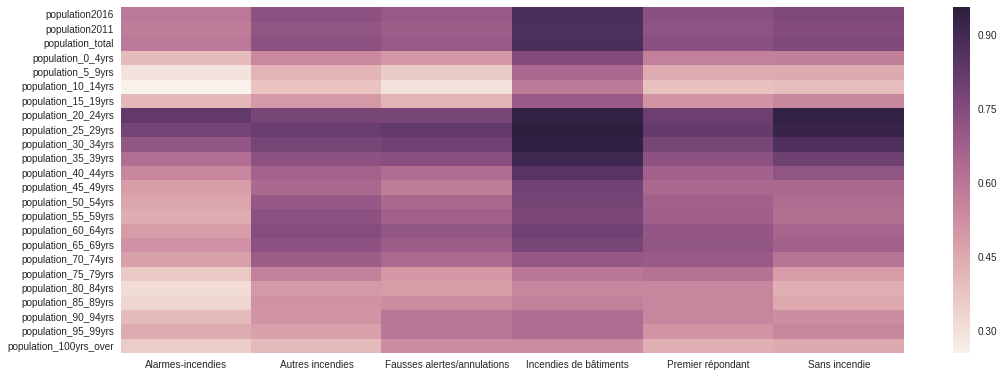

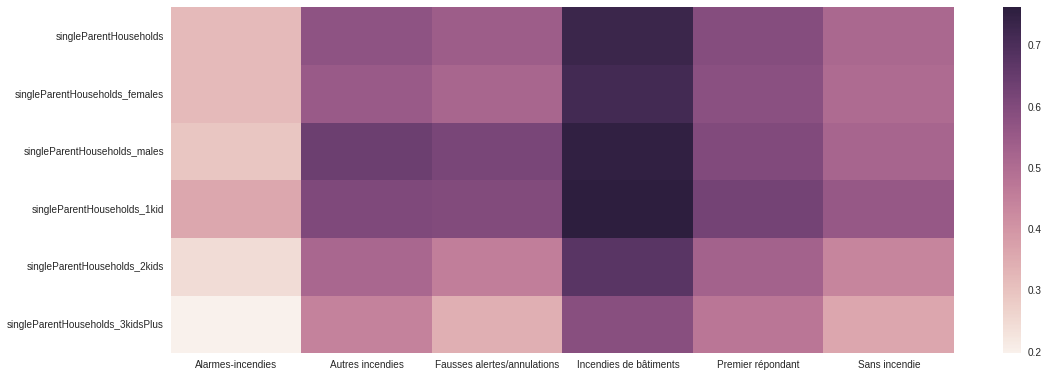

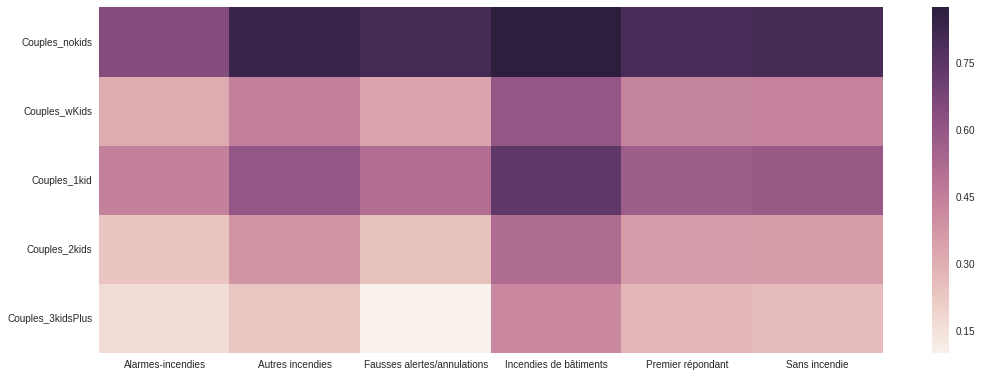

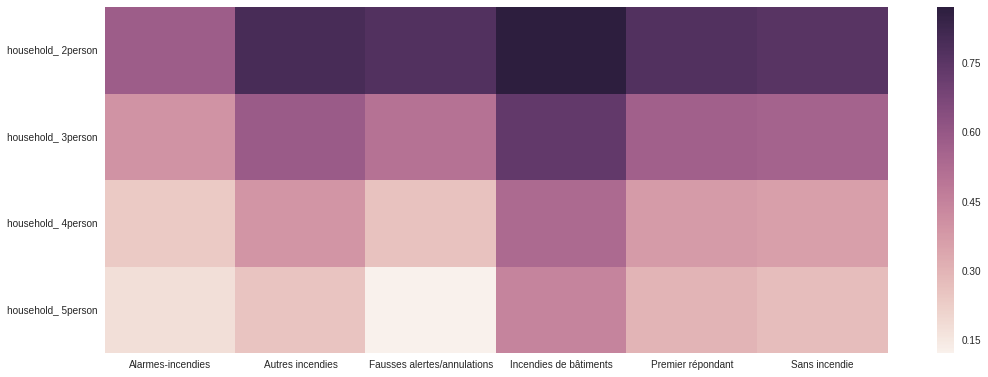

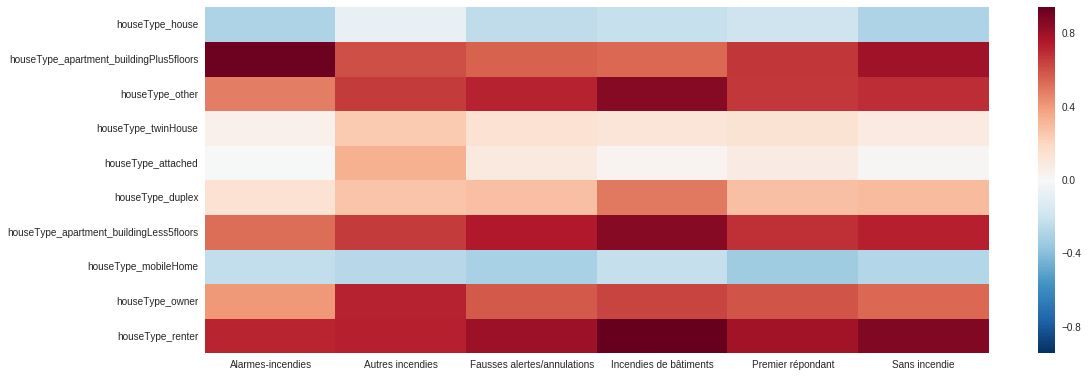

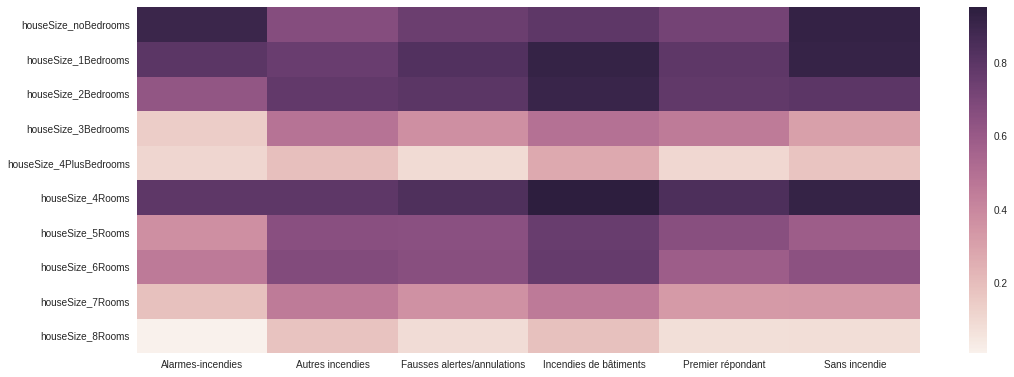

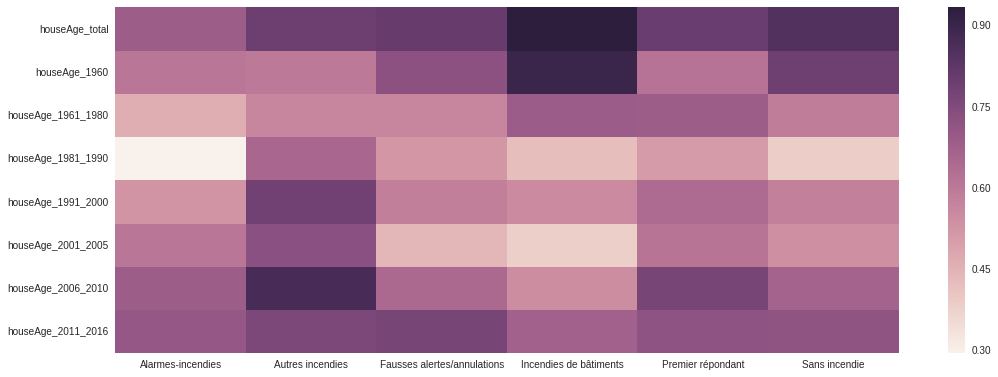

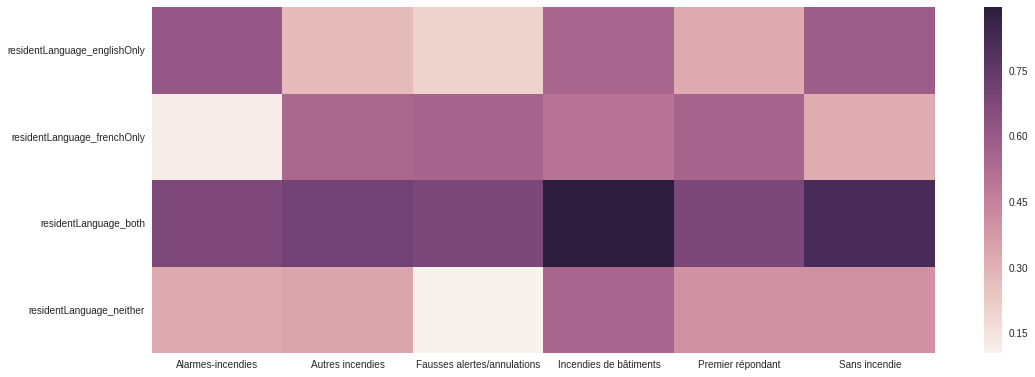

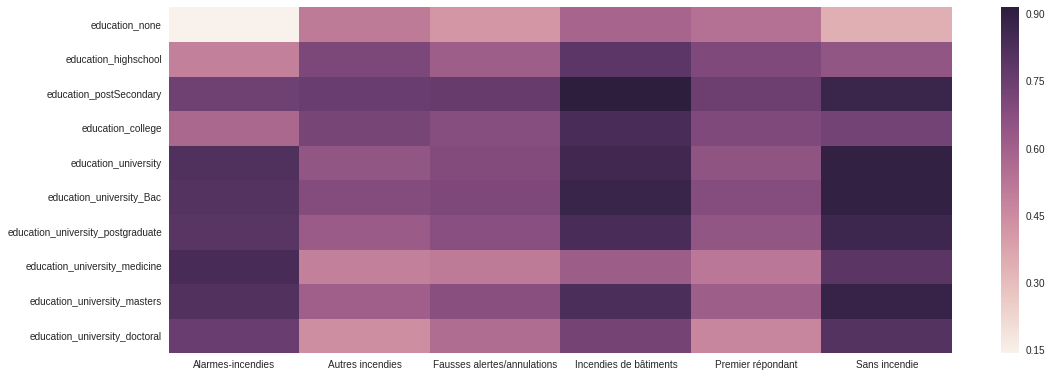

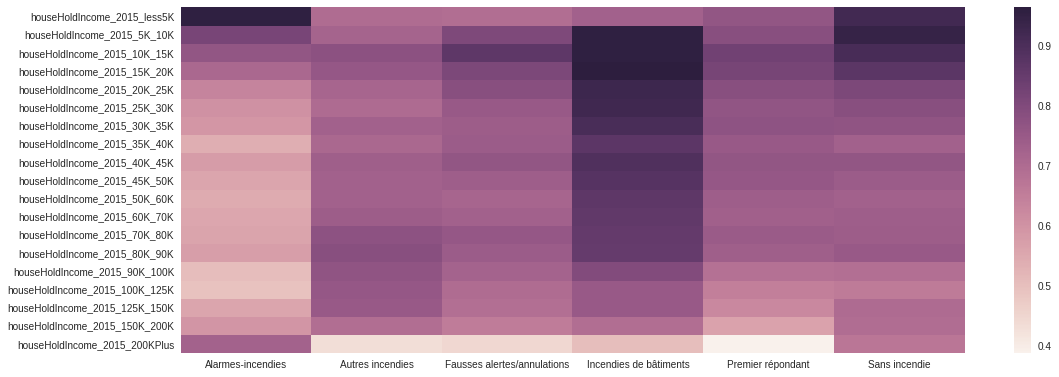

In [179]:
factor_groups = ['population','singleParentHouseholds','Couple','household','houseType','houseSize','houseAge','residentLanguage','education','houseHoldIncome']

for group in factor_groups:
  c_matrix_group = c_matrix.loc[c_matrix.index.str.startswith(group)] 
  print('')  
  import seaborn as sns
  plt.figure(figsize=(17,12))

  plt.subplots_adjust(left=0.1, right=0.9,top=0.5,bottom=0.1)
  sns.heatmap(c_matrix_group, 
              xticklabels=c_matrix_group.columns.values,
              yticklabels=c_matrix_group.index.values)
 


We can see some interesting correlation in the figures above. For example 
1. High correlation  between "Incendies de batiments" and the low income house holds , old houses, and rented houses
2. High Correlation of incidents with "couples_nokids".

